In [2]:
import pandas as pd
df = pd.read_csv("book_descriptions_unsupervised.csv")
df.head()

,title,author,description
0,The Broken Garden,Silas Heart,"In a bustling city, Juno Fen finds unexpected ..."
1,The Fading Dream,Omar Heart,Samir Marrow embarks on a journey through time...
2,The Shattered Ashes,Fenwick Sterling,Silas Heart and a rival captain find love amon...
3,The Dark Memory,Samir Vance,"In a brutal realm, Omar Wren must survive betr..."
4,The Dark Garden,Helen Locke,Omar Marrow embarks on a journey through time ...


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['description'])

In [7]:
from sklearn.cluster import KMeans
num_clusters = 11
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
df['cluster'] = kmeans.labels_

In [11]:
for cluster_num in range(num_clusters):
    print(f"\nCluster {cluster_num}")
    sample = df[df['cluster'] == cluster_num].sample(5, random_state=42)
    print(sample[['title', 'description']])


Cluster 0
                 title                                        description
347      The Lost Song  Amidst the rise and fall of dynasties, Lila Mo...
25      The Lost River  Amidst the rise and fall of dynasties, Silas M...
578  The Fading Secret  Amidst the rise and fall of dynasties, Clariss...
76   The Shattered Sky  Amidst the rise and fall of dynasties, Fenwick...
645    The Silent Song  Amidst the rise and fall of dynasties, Avery H...

Cluster 1
                 title                                        description
18      The Hidden Sky  Avery Vance embarks on a journey through time ...
685  The Fading Secret  Helen Fen embarks on a journey through time an...
154   The Broken Dream  Juno Graves embarks on a journey through time ...
1     The Fading Dream  Samir Marrow embarks on a journey through time...
303  The Fading Secret  Omar Vale embarks on a journey through time an...

Cluster 2
                   title                                        description
262

In [15]:
# transforming dimensions to 2D using PCA...going to import a new set of libraries as well
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_reduced = pca.fit_transform(X.toarray())

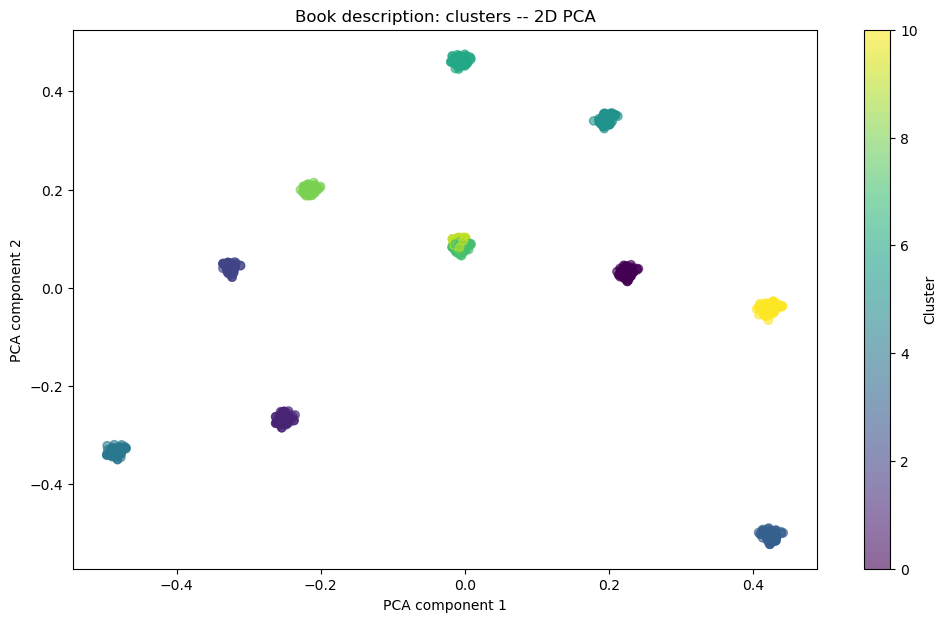

In [27]:
# plotting...
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.title('Book description: clusters -- 2D PCA')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()